uitleg knn -> werking: buren
uitleg decision-tree-regr -> alg uitleg

Data set:
    split in train + test
    uitleg cross-val (uit cursus) + extend naar time series

WARD:
KNN -> cross met train (gridsearch gedoe) -> geeft knn met beste params
repeat for decision tree regr

vgl test err op test set + plot

conclusie: x beter dan y in deze situatie ...




voorspellings lijn over de tijd van test set


how do x models compare to time series data:
concl: knn wrs shit

### 1.2.1 Training data description


The data contains 15000 measurements from the period: 01/11/2016 untill 24/04/2016. These are measurements of four months, of 105 different day. Each day contains 144 measure. This is one measure every ten minutes.

Below, a table can be seen that shows the data we are given. All the features contain numbers, except the feature "date" which is of the type datetime. This must be taken into consideration when feeding a model with this data. Not every model is can handle the datetime so we will adapt it.

| | Column | Data type |
| --- | --- | --- |
| 1  |  date |          datetime |
| 2  |  T1 - T9 |       float64 |
| 3  |  RH_1 - RH_9 |   float64 |
| 20 |  T_out |         float64 |
| 21 |  Press_mm_hg |   float64 |
| 22 |  RH_out |        float64 |
| 23 |  Windspeed |     float64 |
| 24 |  Visibility |    float64 |
| 25 |  Tdewpoint |     float64 |
| 26 |  rv1 |           float64 |
| 27 |  rv2 |           float64 |
| 28 |  lights |        int64 |
| 29 |  Appliances |    int64 |

In [4]:
data = load_data()
# first split data into two parts, s.t training data can be visualized without snooping into test data
train, test = trainTestSplit(data)
xs_train, ys_train = preprocess(train)
xs_test, ys_test = preprocess(test)

# Smaller sample for plotting, otherwise too much data, training will happen on all training data
sample = train[train['minute'] == 0]  # 2500 elements
# visualizations are only done on training data, not on test data

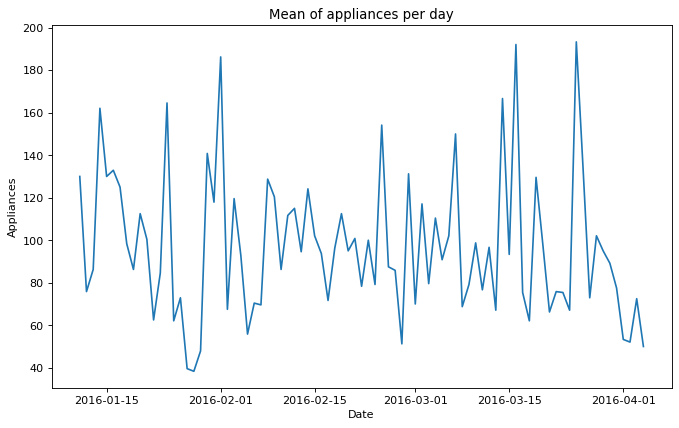

In [5]:
# Code copied from assignment from Fabian's previous course: Machine Learning

# Plot the mean of appliances per day
figure(figsize=(10, 6), dpi=80)

meanPerDay = sample.groupby('date-short', as_index=False)['Appliances'].mean()
plt.plot(meanPerDay['date-short'], meanPerDay['Appliances'])
plt.title("Mean of appliances per day")
plt.xlabel("Date")
plt.ylabel("Appliances")
plt.show()

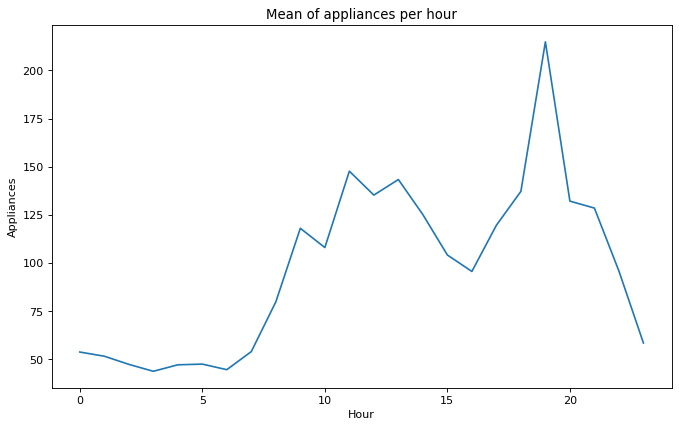

In [6]:
# Code copied from assignment from Fabian's previous course: Machine Learning

figure(figsize=(10, 6), dpi=80)

differentDates = sample['date-short'].unique()
# remove first day and and last day because those two days don't have measures of entire day
length = len(differentDates)
differentDates = differentDates[1: length - 1]

hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
appliances = []
for date in differentDates:
    oneDay = sample[sample['date-short'] == date]
    appliances.append(oneDay['Appliances'].values)

means = np.mean(appliances, axis=0)

plt.title("Mean of appliances per hour")
plt.xlabel("Hour")
plt.ylabel("Appliances")
plt.plot(hours, means)
plt.show()

In [7]:
from sklearn.tree import DecisionTreeRegressor

reg = trainAndTest(DecisionTreeRegressor, xs_train, ys_train, xs_test, ys_test)

DecisionTreeRegressor
RMSE (train): 0.0
RMSE (test): 162.07868459485965
Cross validation RMSE: -96.49724301428503


In [8]:
xs_test

,lights,day,month,hour,minute,T1,RH_1,T2,RH_2,T3,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
12000,0,3,3,1,0,21.926667,44.500000,20.666667,45.663333,23.000000,...,24.200000,50.326667,20.39,46.260000,14.8,748.500000,77.000000,5.000000,29.0,10.700000
12001,0,3,3,1,1,22.000000,44.500000,20.600000,45.663333,23.000000,...,24.200000,50.500000,20.39,46.326667,14.6,748.516667,78.000000,4.666667,29.0,10.716667
12002,0,3,3,1,2,21.926667,44.500000,20.600000,45.730000,23.000000,...,24.133333,50.500000,20.39,46.466667,14.4,748.533333,79.000000,4.333333,29.0,10.733333
12003,0,3,3,1,3,21.963333,44.500000,20.533333,45.790000,23.000000,...,24.066667,50.560000,20.39,46.766667,14.2,748.550000,80.000000,4.000000,29.0,10.750000
12004,0,3,3,1,4,21.890000,44.500000,20.500000,45.900000,23.000000,...,24.066667,50.693333,20.39,46.966667,14.0,748.566667,81.000000,3.666667,29.0,10.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,23,3,20,1,22.100000,35.760000,19.533333,37.400000,22.390000,...,24.356667,35.760000,20.29,33.030000,5.1,757.833333,73.666667,4.666667,40.0,0.700000
14996,10,23,3,20,2,22.033333,35.626667,19.500000,37.290000,22.426667,...,24.356667,35.700000,20.29,32.900000,4.9,757.866667,75.333333,4.333333,40.0,0.800000
14997,0,23,3,20,3,22.000000,35.466667,19.426667,37.290000,22.426667,...,24.390000,35.663333,20.29,32.826667,4.7,757.900000,77.000000,4.000000,40.0,0.900000
14998,0,23,3,20,4,22.000000,35.400000,19.356667,37.360000,22.390000,...,24.390000,35.663333,20.26,32.663333,4.5,757.933333,78.666667,3.666667,40.0,1.000000


In [128]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# import warnings
# warnings.filterwarnings('ignore')


In [101]:
columns = [
    "date",
    "lights",
    "T1", "RH_1",
    "T2", "RH_2",
    "T3", "RH_3",
    "T4", "RH_4",
    "T5", "RH_5",
    "T6", "RH_6",
    "T7", "RH_7",
    "T8", "RH_8",
    "T9", "RH_9",
    "T_out",
    "Press_mm_hg",
    "RH_out",
    "Windspeed",
    "Visibility",
    "Tdewpoint",
    "Appliances"
]

data = pd.read_csv("data-rq-3/train.csv", header=0, usecols=columns)
data

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances
0,2016-01-11 17:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.3,60
1,2016-01-11 17:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.2,60
2,2016-01-11 17:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.1,50
3,2016-01-11 17:30:00,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.0,50
4,2016-01-11 17:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.9,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-04-24 20:10:00,0,22.100000,35.760000,19.533333,37.400000,22.390000,34.030000,21.500000,32.578750,...,35.760000,20.290000,33.030000,5.100000,757.833333,73.666667,4.666667,40.000000,0.7,110
14996,2016-04-24 20:20:00,10,22.033333,35.626667,19.500000,37.290000,22.426667,34.000000,21.468571,32.471429,...,35.700000,20.290000,32.900000,4.900000,757.866667,75.333333,4.333333,40.000000,0.8,110
14997,2016-04-24 20:30:00,0,22.000000,35.466667,19.426667,37.290000,22.426667,34.000000,21.390000,32.290000,...,35.663333,20.290000,32.826667,4.700000,757.900000,77.000000,4.000000,40.000000,0.9,110
14998,2016-04-24 20:40:00,0,22.000000,35.400000,19.356667,37.360000,22.390000,33.900000,21.390000,32.277143,...,35.663333,20.260000,32.663333,4.500000,757.933333,78.666667,3.666667,40.000000,1.0,110


In [102]:
data['date'] = pd.to_datetime(data['date'])

data["month"] = pd.to_numeric(data["date"].dt.strftime("%m"))
data["day"] = pd.to_numeric(data["date"].dt.strftime("%d"))
data["hour"] = pd.to_numeric(data["date"].dt.strftime("%H"))
data["minute"] = pd.to_numeric(data["date"].dt.strftime("%M"))

data.drop("date", 1, inplace=True)

/tmp/ipykernel_3434/2958525391.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop("date", 1, inplace=True)


In [123]:
X = data.drop("Appliances", 1)
y = data["Appliances"]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

/tmp/ipykernel_3434/2806542337.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("Appliances", 1)


In [160]:
model = make_pipeline(StandardScaler(),
                      DecisionTreeRegressor(random_state=0))
model.fit(X_train, y_train)

print(model.score(X_train, y_train), model.score(X_test, y_test))
print(mean_squared_error(y_train, model.predict(X_train), squared=False),
      mean_squared_error(y_test, model.predict(X_test), squared=False))

1.0 -1.8287793614377574
0.0 171.7146470164965


In [188]:
from time import time

model = make_pipeline(StandardScaler(),
                      KNeighborsRegressor())
model.fit(X_train, y_train)
a = time()

print(model.score(X_train, y_train), model.score(X_test, y_test))
print(mean_squared_error(y_train, model.predict(X_train), squared=False),
      mean_squared_error(y_test, model.predict(X_test), squared=False))
model
print((time() - a) / 60)


0.6592985098165846 -0.08504506244978716
62.93449151476655 106.34857905335015
0.20364570220311481


In [ ]:

parameters = {
    "decisiontreeregressor__splitter": ["best", "random"],
    "decisiontreeregressor__max_depth": [8, 10, 12, 14, 16, None],
    "decisiontreeregressor__min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "decisiontreeregressor__min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "decisiontreeregressor__min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.4, 0.5],
    "decisiontreeregressor__max_features": [None, "log2", "sqrt"],
    "decisiontreeregressor__max_leaf_nodes": [10, 20, 30, 40, 50, 60, 70, None],
    "decisiontreeregressor__min_impurity_decrease": [0, 0.25, 0.5, 1],
    "decisiontreeregressor__ccp_alpha": [0, 0.5, 1, 1.5],
}

parameters = {
    "kneighborsregressor__n_neighbors": [1, 5, 10, 20, 40, 50],
    "kneighborsregressor__weights": ["uniform", "distance"],
    "kneighborsregressor__leaf_size": [5, 10, 20, 30, 40],
    "kneighborsregressor__p": [1, 2, 3, 4],
}

a = time()
tuner = RandomizedSearchCV(model, parameters, n_iter=100, n_jobs=-2, cv=TimeSeriesSplit(), verbose=1, random_state=0)

tuner.fit(X_train, y_train)
print((time() - a) / 60)
print(tuner.best_score_)
print(tuner.best_params_)

print(tuner.score(X_train, y_train), tuner.score(X_test, y_test))
print(mean_squared_error(y_train, tuner.predict(X_train), squared=False),
      mean_squared_error(y_test, tuner.predict(X_test), squared=False))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
